In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [28]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
    X = np.column_stack((x_1, x_2))
    statistic = None
    if model == 1:
        ols = sm.OLS(y, X).fit()
        statistic =  (ols.model.endog-ols.fittedvalues)**2
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (lasso.model.endog-lasso.fittedvalues)**2
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (ridge.model.endog-ridge.fittedvalues)**2
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ols_mse = (ols.model.endog-ols.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (lasso.model.endog-lasso.fittedvalues)**2
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (ridge.model.endog-ridge.fittedvalues)**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)


print(setup_test_mse(1000, 1, .1, 1, 1))

21.70026074502979


### Varying values

In [29]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        y, x_1, x_2 = gen_data(nobs=i, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, i, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, i, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, i, a, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
            plt.legend()
            plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
            plt.legend(['model1','model2'])
            plt.show()

Vary Observations
Mean: 7.305209148420288 Median: 7.327284295356563 Mode: [[4.45489345]] Variance: 0.6582676276147194
Mean: 11.342606092653805 Median: 11.354994259297161 Mode: [[8.72629546]] Variance: 0.6714170400959997
Mean: 15.948329441197398 Median: 15.975170598258558 Mode: [[12.05062648]] Variance: 0.778271905005617
Mean: 22.488129453979855 Median: 22.47395663951123 Mode: [[19.69423249]] Variance: 0.6986397691065062


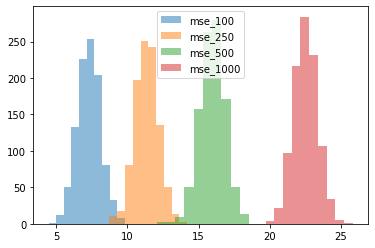

Vary Alpha Levels
Mean: 22.44243364382777 Median: 22.473922689333122 Mode: [[19.97249059]] Variance: 0.700369941222243
Mean: 22.42282556145938 Median: 22.44066639254786 Mode: [[19.50406656]] Variance: 0.7648697293585301
Mean: 22.46358030263489 Median: 22.503938903081092 Mode: [[19.80613795]] Variance: 0.7370611455557796
Mean: 22.449451764856253 Median: 22.465240188393594 Mode: [[19.04126312]] Variance: 0.7149562324692288


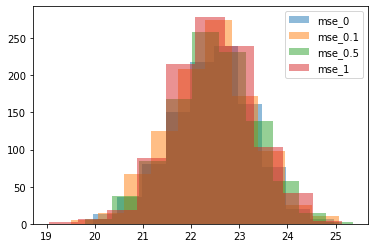

Vary Multiplicative Factors
Mean: 22.453283839945414 Median: 22.43164526323525 Mode: [[19.13689782]] Variance: 0.815225189895827
Mean: 22.405320030580967 Median: 22.40837344547798 Mode: [[19.22140377]] Variance: 0.7211174067924507
Mean: 22.433444602633674 Median: 22.444709616094578 Mode: [[19.88521249]] Variance: 0.7151288621325385
Mean: 22.44365834142555 Median: 22.450525982694906 Mode: [[19.44229154]] Variance: 0.6936103931469175


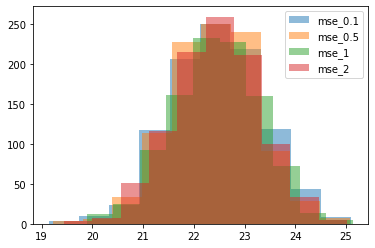

Vary X Variables
Mean: 22.432528121185552 Median: 22.44758062598885 Mode: [[19.961428]] Variance: 0.6794325006335836
Mean: 22.4874081104335 Median: 22.47305475171662 Mode: [[19.26186381]] Variance: 0.7138911828928811
Mean: 22.412034393238763 Median: 22.41197029172873 Mode: [[19.3401375]] Variance: 0.6839888159838812
Mean: 22.48005111880878 Median: 22.45187860450888 Mode: [[18.89016532]] Variance: 0.7731092111977947


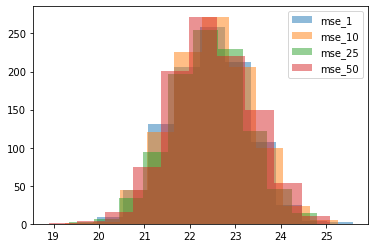

In [30]:
# Model = 1 is OLS
print('Vary Observations')
vary_obs(1)
print('Vary Alpha Levels')
vary_alpha(1)
print('Vary Multiplicative Factors')
vary_multiply(1)
print('Vary X Variables')
vary_xvars(1)
#print('Plot Coefficients')
#params_scatter(1)

Vary Observations
Mean: 7.326926678990634 Median: 7.285292242799448 Mode: [[4.72028174]] Variance: 0.6320754262604975
Mean: 11.352408611009878 Median: 11.372498986737037 Mode: [[8.29537908]] Variance: 0.7026641292972786
Mean: 15.92499304613911 Median: 15.96795362285382 Mode: [[12.47339642]] Variance: 0.7053461679069777
Mean: 22.473082358503405 Median: 22.468110028806144 Mode: [[19.13865675]] Variance: 0.6815753877510076


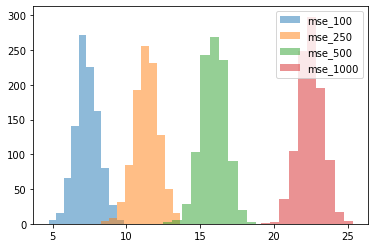

Vary Alpha Levels
Mean: 22.435590168468057 Median: 22.4581633248106 Mode: [[19.62925903]] Variance: 0.7533442593116207
Mean: 22.43015791081328 Median: 22.44384011987878 Mode: [[19.79285433]] Variance: 0.7459056212565012
Mean: 22.453460655089398 Median: 22.454158886320762 Mode: [[19.4310428]] Variance: 0.7632908304848945
Mean: 22.47832359780718 Median: 22.518955441111206 Mode: [[19.58981865]] Variance: 0.6895854825388912


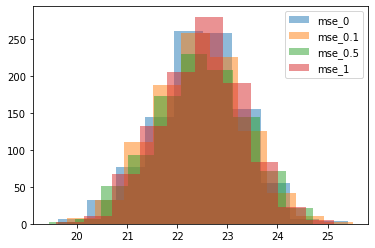

Vary Multiplicative Factors
Mean: 22.410032234504346 Median: 22.44533608104768 Mode: [[20.095452]] Variance: 0.7280291185981737
Mean: 22.449484414484516 Median: 22.503056797572196 Mode: [[19.72292093]] Variance: 0.6899574333958771
Mean: 22.414793954709875 Median: 22.432836360435694 Mode: [[18.98529058]] Variance: 0.7112112421098122
Mean: 22.445121282172945 Median: 22.402695984268952 Mode: [[19.17283095]] Variance: 0.7641747977130195


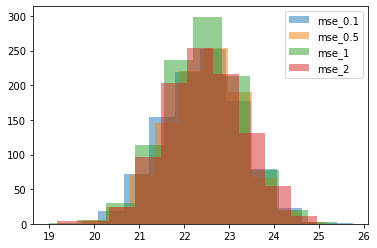

Vary X Variables
Mean: 22.440629953668036 Median: 22.487962388144553 Mode: [[19.64101277]] Variance: 0.7094271281792672
Mean: 22.465665355947415 Median: 22.47691330916028 Mode: [[19.72662797]] Variance: 0.7190054632247095
Mean: 22.408626875491745 Median: 22.404977130409584 Mode: [[19.88358305]] Variance: 0.739308153839401
Mean: 22.480147993954645 Median: 22.46840254844586 Mode: [[19.58903736]] Variance: 0.7336733518696962


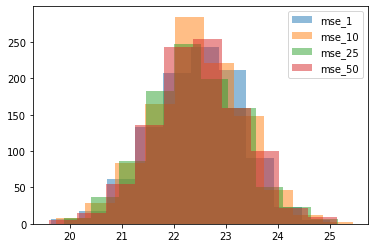

In [31]:
# Model = 2 is Lasso
print('Vary Observations')
vary_obs(2)
print('Vary Alpha Levels')
vary_alpha(2)
print('Vary Multiplicative Factors')
vary_multiply(2)
print('Vary X Variables')
vary_xvars(2)
#print('Plot Coefficients')
#params_scatter(2)

Vary Observations
Mean: 7.365370207794216 Median: 7.408750515208796 Mode: [[4.39349366]] Variance: 0.6203036263337561
Mean: 11.312980309021684 Median: 11.356396211823611 Mode: [[7.49197808]] Variance: 0.6929846509789117
Mean: 15.961923534335806 Median: 15.928088732168671 Mode: [[12.68288512]] Variance: 0.7635134293530015
Mean: 22.46842798456667 Median: 22.485772750231018 Mode: [[19.68477074]] Variance: 0.7925112856673447


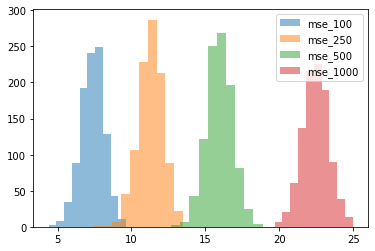

Vary Alpha Levels
Mean: 22.469084878347445 Median: 22.491338729336757 Mode: [[19.49437544]] Variance: 0.7122133181817568
Mean: 22.465164497011692 Median: 22.46979053763503 Mode: [[19.79186204]] Variance: 0.7092797748917252
Mean: 22.459073838406997 Median: 22.466249010171957 Mode: [[19.2923273]] Variance: 0.728105886911606
Mean: 22.449465534934685 Median: 22.46707437378025 Mode: [[19.55821229]] Variance: 0.7210831501902892


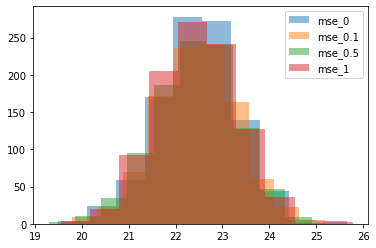

Vary Multiplicative Factors
Mean: 22.44047185694603 Median: 22.48752809667777 Mode: [[19.65522847]] Variance: 0.6925533304551931
Mean: 22.469967313930457 Median: 22.467953647071887 Mode: [[19.29869264]] Variance: 0.6943347748609475
Mean: 22.4515588395349 Median: 22.41867002812422 Mode: [[19.66342414]] Variance: 0.6117142624548054
Mean: 22.421533924301436 Median: 22.389750652514227 Mode: [[19.23443418]] Variance: 0.7317755241830095


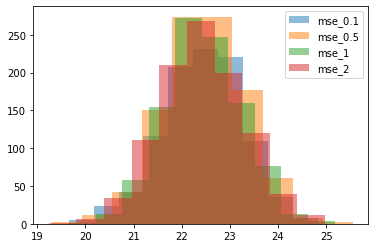

Vary X Variables
Mean: 22.45492238853069 Median: 22.47120856715786 Mode: [[19.36768419]] Variance: 0.7480650657073951
Mean: 22.471805731172775 Median: 22.468858442812273 Mode: [[19.6469995]] Variance: 0.6858342847303774
Mean: 22.435050273695293 Median: 22.46387518716928 Mode: [[19.38370118]] Variance: 0.716738830525112
Mean: 22.452501771950587 Median: 22.466182494581012 Mode: [[19.15957281]] Variance: 0.7065833793362402


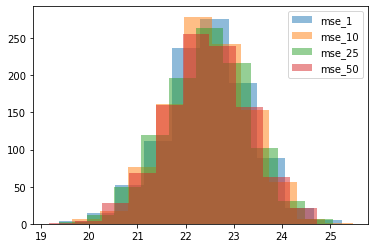

In [32]:
# Model = 3 is Ridge
print('Vary Observations')
vary_obs(3)
print('Vary Alpha Levels')
vary_alpha(3)
print('Vary Multiplicative Factors')
vary_multiply(3)
print('Vary X Variables')
vary_xvars(3)
#print('Plot Coefficients')
#params_scatter(3)

Vary Observations
Mean: -1.3415609241527404 Median: -1.3257526514854767 Mode: [[-2.16993642]] Variance: 0.052357174690025376
Mean: -1.634499566617186 Median: -1.6235163132708115 Mode: [[-2.51789516]] Variance: 0.06363827172305378
Mean: -1.9114440276325817 Median: -1.9002313214012483 Mode: [[-2.70814522]] Variance: 0.0721383088176279
Mean: -2.223741869289805 Median: -2.197503895988116 Mode: [[-3.28358171]] Variance: 0.06445866867783726


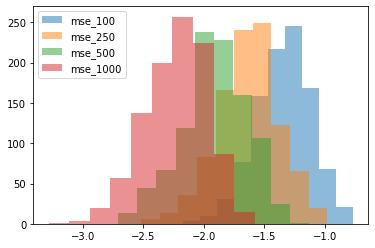

Vary Alpha Levels
Mean: -0.0002246338039561079 Median: -3.196440727386259e-05 Mode: [[-0.05946152]] Variance: 3.147239997521109e-05
Mean: -2.2323879533455018 Median: -2.207593575823882 Mode: [[-3.10357539]] Variance: 0.06191769306797207
Mean: -7.654609246545725 Median: -7.63924511301767 Mode: [[-9.03491672]] Variance: 0.11176958010871613
Mean: -13.023127003603216 Median: -13.020547073559747 Mode: [[-14.90749935]] Variance: 0.31167316853513305


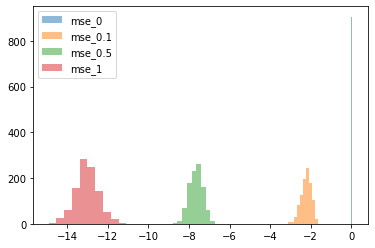

Vary Multiplicative Factors
Mean: -2.102965734307526 Median: -2.1081795841678943 Mode: [[-3.3098491]] Variance: 0.09694174984484921
Mean: -2.227563999372622 Median: -2.213796243466339 Mode: [[-3.08585427]] Variance: 0.06806580880533893
Mean: -2.2400207232803293 Median: -2.220088381720273 Mode: [[-3.24503155]] Variance: 0.0710319240173043
Mean: -2.244712362277205 Median: -2.23193716348521 Mode: [[-3.23235617]] Variance: 0.06434527766962829


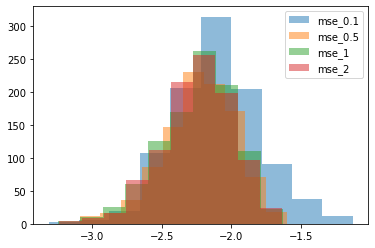

Vary X Variables
Mean: -1.659181226472383 Median: -1.6405590489934556 Mode: [[-2.31933866]] Variance: 0.01466799787367079
Mean: -2.225006474488654 Median: -2.1995184134891543 Mode: [[-3.1166262]] Variance: 0.06352294850571141
Mean: -2.953826401482032 Median: -2.927544497285133 Mode: [[-4.16587752]] Variance: 0.0966231089764253
Mean: -3.9049286466021855 Median: -3.904226738460576 Mode: [[-5.43714773]] Variance: 0.1226223962000382


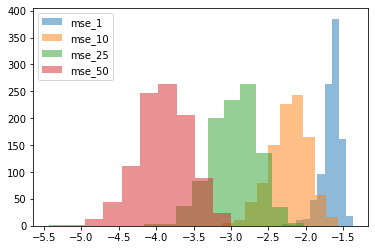

In [33]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)

Vary Observations
Mean: -0.5431438750484563 Median: -0.5353885861436578 Mode: [[-0.94046403]] Variance: 0.008942713537916702
Mean: -0.7685597936870775 Median: -0.7648529585254338 Mode: [[-1.09490708]] Variance: 0.006837997854989508
Mean: -1.0512046748697295 Median: -1.0498521490979995 Mode: [[-1.36454619]] Variance: 0.006123474194553073
Mean: -1.46011820642623 Median: -1.4571905443826618 Mode: [[-1.74470786]] Variance: 0.005920604428825543


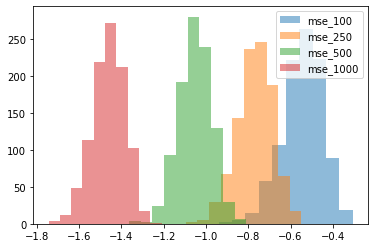

Vary Alpha Levels
Mean: 0.011124203119074125 Median: 0.009219953776825721 Mode: [[-1.50169568]] Variance: 0.08652316751253614
Mean: -12.196586805120688 Median: -12.19544366102792 Mode: [[-14.03543653]] Variance: 0.22650807973732232
Mean: -20.659472329828297 Median: -20.677559176857894 Mode: [[-23.04882867]] Variance: 0.6265264898213739
Mean: -21.595398894280304 Median: -21.60262380478538 Mode: [[-24.23952931]] Variance: 0.6907011148010505


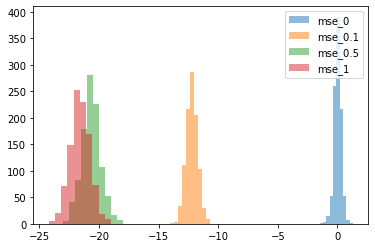

Vary Multiplicative Factors
Mean: -0.2103571081868726 Median: -0.20918287754415654 Mode: [[-0.35512213]] Variance: 0.0017564109466041155
Mean: -0.7424664153426976 Median: -0.74134160940567 Mode: [[-0.91558833]] Variance: 0.0031846929001256934
Mean: -1.4589381874084 Median: -1.4584215281988835 Mode: [[-1.72361481]] Variance: 0.005821293023603018
Mean: -2.892016115450194 Median: -2.8900077066392535 Mode: [[-3.43181462]] Variance: 0.01802694374932537


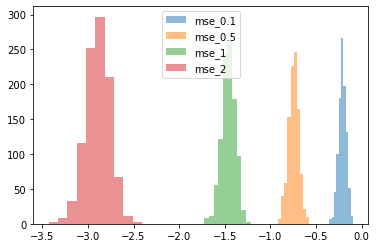

Vary X Variables
Mean: -1.4468796126700711 Median: -1.447282583318183 Mode: [[-1.74267229]] Variance: 0.005416103235395565
Mean: -1.4609247581100169 Median: -1.4591431736521825 Mode: [[-1.74387903]] Variance: 0.006313482982888645
Mean: -1.4896130272344839 Median: -1.485892972146271 Mode: [[-1.75145389]] Variance: 0.006045931462287537
Mean: -1.5406296987357542 Median: -1.535967304128088 Mode: [[-1.78425886]] Variance: 0.006470224070630017


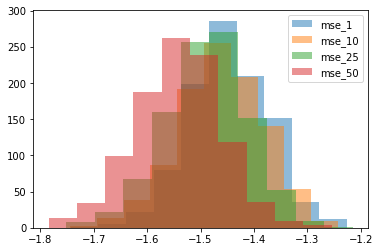

In [34]:
# Model = 5 is OlS - Ridge
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)

Vary Observations
Mean: 1.4143007384949844 Median: 1.398706040555111 Mode: [[0.44037681]] Variance: 0.0823889127983407
Mean: 1.647084232574259 Median: 1.63800664108553 Mode: [[0.80621532]] Variance: 0.09182480563112481
Mean: 1.8103714151409347 Median: 1.8010900294568701 Mode: [[0.84707668]] Variance: 0.11159648514564624
Mean: 1.983903908547212 Median: 1.9567405732167042 Mode: [[0.93618827]] Variance: 0.10725988910775774


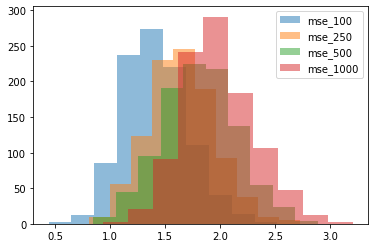

Vary Alpha Levels
Mean: -5.491861357996668e-05 Median: -9.087289459825361e-06 Mode: [[-0.1086692]] Variance: 3.584767102244699e-05
Mean: -12.872092511619588 Median: -12.871057910482836 Mode: [[-14.50010782]] Variance: 0.2684119020894398
Mean: -21.078897189192013 Median: -21.092624884642266 Mode: [[-24.03065652]] Variance: 0.668093164724285
Mean: -21.90837000525429 Median: -21.91940221719077 Mode: [[-24.69783748]] Variance: 0.7066594148783213


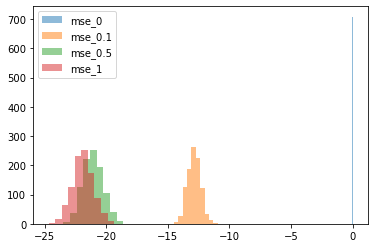

Vary Multiplicative Factors
Mean: 2.29280570604696 Median: 2.300879459565712 Mode: [[1.19067598]] Variance: 0.12360857763204368
Mean: 2.648054725478987 Median: 2.6242931615626466 Mode: [[2.1464788]] Variance: 0.05391425112254662
Mean: 1.9803645219551693 Median: 1.9683865882322027 Mode: [[1.07502158]] Variance: 0.10803205553694366
Mean: -1.8265775903251589 Median: -1.8699476571432685 Mode: [[-3.8800772]] Variance: 0.582614754322022


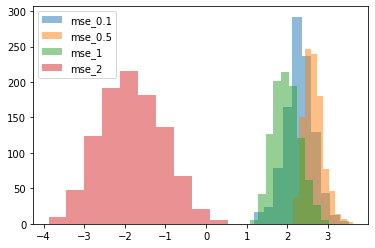

Vary X Variables
Mean: 1.8479363137096498 Median: 1.6974242181384667 Mode: [[0.41728216]] Variance: 0.35124666127050586
Mean: 1.986205071301405 Median: 1.9768145964869497 Mode: [[0.958039]] Variance: 0.10684286033358241
Mean: 2.8636705456129627 Median: 2.8581092554730745 Mode: [[1.32972797]] Variance: 0.1480674587476494
Mean: 3.969460759046894 Median: 3.959111649713367 Mode: [[2.66907825]] Variance: 0.15161248579806716


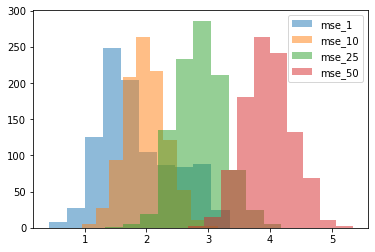

In [35]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6)